<a href="https://colab.research.google.com/github/KarthikGogisetty07/Covid19_CNN/blob/main/Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten 
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/225, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)
# zoom range less than 1 implies that the image will be zoomed in x% in 0.x 
# value we assgin, While zooms out if it's greater than 1.0
# Shear range is the distortion in a particular axis: augment image


In [ ]:
train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/xray_dataset_covid19/train", target_size = (256, 256), batch_size = 16, class_mode = "binary")

Found 148 images belonging to 2 classes.


In [ ]:
train_data.class_indices
# Discoving of classes in the folder.

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/225
)
# No agumentation for test set: Cause your testing the data set irrespective of it's 
# orientation using the model you built.

test_data = test_datagen.flow_from_directory(directory = "/content/drive/MyDrive/xray_dataset_covid19/test", target_size = (256, 256), batch_size = 16, class_mode = "binary")

Found 40 images belonging to 2 classes.


In [ ]:
# CNN Model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256, 256, 3)))
# Layer -1:
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))
# Layer -2:
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))
# Layer -3:
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.50))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['acc'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

In [ ]:
cnn = model.fit_generator(train_data, steps_per_epoch = 8, epochs = 15, validation_steps = 2, 
                          validation_data = test_data
                          )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 68s 7s/step - loss: 4.6969 - acc: 0.5623 - val_loss: 0.6708 - val_acc: 0.5312
Epoch 2/15
8/8 [==============================] - 47s 6s/step - loss: 0.6628 - acc: 0.5658 - val_loss: 0.6424 - val_acc: 0.6875
Epoch 3/15
8/8 [==============================] - 46s 6s/step - loss: 0.5881 - acc: 0.7071 - val_loss: 0.5112 - val_acc: 1.0000
Epoch 4/15
8/8 [==============================] - 46s 6s/step - loss: 0.5396 - acc: 0.7128 - val_loss: 0.5986 - val_acc: 0.9688
Epoch 5/15
8/8 [==============================] - 46s 6s/step - loss: 0.5246 - acc: 0.8258 - val_loss: 0.4141 - val_acc: 0.9062
Epoch 6/15
8/8 [==============================] - 46s 6s/step - loss: 0.4938 - acc: 0.7449 - val_loss: 0.3825 - val_acc: 0.9375
Epoch 7/15
8/8 [==============================] - 46s 6s/step - loss: 0.3606 - acc: 0.8430 - val_loss: 0.3769 - val_acc: 1.0000
Epoch 8/15
8/8 [==============================] - 46s 6s/step - loss: 0.3731 - acc: 0.8478 - val_loss: 0

In [ ]:
h = cnn.history
h.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

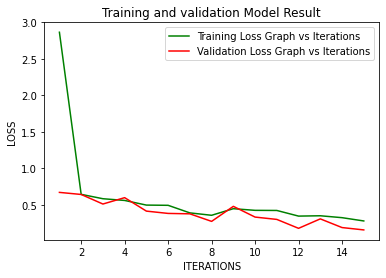

In [ ]:

losstrain = cnn.history['loss']
lossval = cnn.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, losstrain, "g", label = 'Training Loss Graph vs Iterations') 
plt.plot(epochs, lossval, "r", label = 'Validation Loss Graph vs Iterations')
plt.title('Training and validation Model Result')
plt.xlabel('ITERATIONS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

In [ ]:
#!unzip ""

In [ ]:
path = "/content/drive/MyDrive/predict pics/Normal-31.png"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (256, 256))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [ ]:
# Prediction gives 0 - Normal, 1 - Corona
model.predict_classes(img)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [ ]:
# Must increase epoch to 100 - 1000 to get better results, It works for few sample pics fails for few Non - Covid cases.